In [78]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap.plot

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

from keras.utils import to_categorical
import keras
from keras import layers
from tensorflow.keras.utils import plot_model 
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator

In [79]:
# Load training data
train_images = pd.read_csv("C:/Users/Fatima Al-Babily/OneDrive/Documents/neural networks/arabic/csvTrainImages 13440x1024.csv")
train_labels = pd.read_csv("C:/Users/Fatima Al-Babily/OneDrive/Documents/neural networks/arabic/csvTrainLabel 13440x1.csv")


In [80]:
#Load test data
test_images = pd.read_csv("C:/Users/Fatima Al-Babily/OneDrive/Documents/neural networks/arabic/csvTestImages 3360x1024.csv")
test_labels = pd.read_csv("C:/Users/Fatima Al-Babily/OneDrive/Documents/neural networks/arabic/csvTestLabel 3360x1.csv")


In [81]:
#print information about the datasets
print("Train Images:")
print(train_images.head())

print("\nTrain Labels:")
print(train_labels.head())

print("\nTest Images:")
print(test_images.head())

print("\nTest Labels:")
print(test_labels.head())


Train Images:
   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.896  0.897  0.898  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.899  0.900  0.901  0.902  0.903  0.904  0.905  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 1024 columns]

Train Labels:
   1
0  1
1  1
2  1
3  1
4  1

Test Images:
   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.919  0.920  0.921  \
0  0    0    0    0    0    0 

In [86]:
#print info about the shape of the dataset
print("Train shape : %s  \nTest: Shape : %s"%(train_images.shape, test_images.shape))

#In the training dataset there are 13440 rows and 1024 columns.
#In the test dataset there are 3360 rows and 1024 columns.

#It says 13439 and 3359 because we started indexing from 0.


Train shape : (13439, 1024)  
Test: Shape : (3359, 1024)


In [87]:
print(f"Number of Classes:", train_labels.nunique())
#This shows there are 28 unique values. There are in fact 28 letters
#in the arabic alphabet.

Number of Classes: 1    28
dtype: int64


In [88]:
#See the top part of the training dataset
train_images.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#get labels and how many data values they hold
label_counts = train_labels.value_counts()

In [90]:
#Check that data is distributed correctly. 480 instances in each class
#is correct
print(label_counts)

1 
15    480
2     480
27    480
26    480
25    480
24    480
23    480
22    480
21    480
20    480
19    480
18    480
17    480
16    480
28    480
14    480
13    480
12    480
11    480
10    480
9     480
8     480
7     480
6     480
5     480
4     480
3     480
1     479
Name: count, dtype: int64


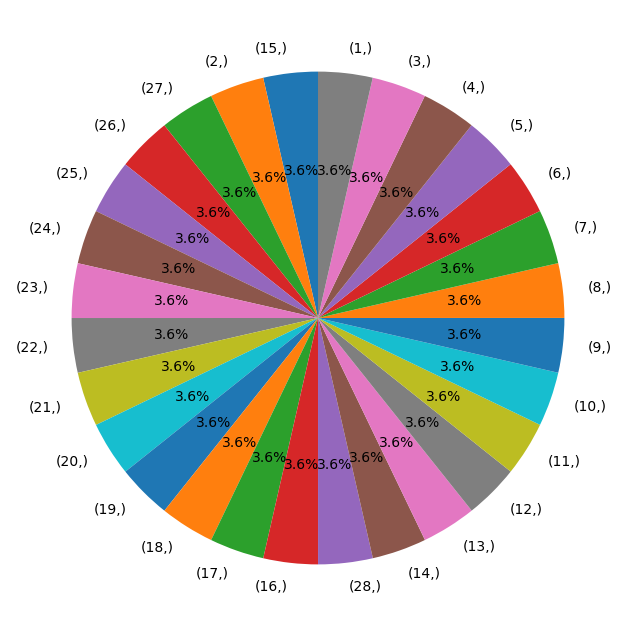

In [91]:
#From piechart we can see that data is evenly distributed
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

In [92]:
#Converting data to NumPy arrays
x_train = train_images.to_numpy()
y_train = train_labels.to_numpy()-1
#subtract 1 to make labels start from 0.

x_test = test_images.to_numpy()
y_test = test_labels.to_numpy()-1 
#subtract 1 to make labels start from 0.


#Printing shape values
print(f"X_Train Shape : {x_train.shape}")
print(f"X_Test  Shape : {x_test.shape}")
print(f"Y_Train Shape : {y_train.shape}")
print(f"Y_Test  Shape : {y_test.shape}")

X_Train Shape : (13439, 1024)
X_Test  Shape : (3359, 1024)
Y_Train Shape : (13439, 1)
Y_Test  Shape : (3359, 1)


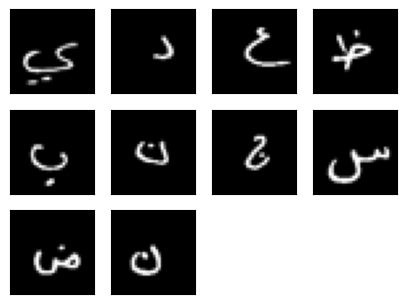

In [93]:
#Display random sample of 10 random images from the training dataset
# Generate a random array of indices based on your dataset size
ra = np.random.randint(0, 13440, size=25)

# Plot and display 10 random images from the training set
plt.figure(figsize=(5, 5))
for i in range(10):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32, 32).T, "gray")
plt.show()

In [94]:
#PREPROCESSING
#Normalization, Reshaping
# Reshape the training and test data to conform with the input shape
# The '-1' is used as a placeholder for the number of images
# to automatically infer the number of images based on the size 
# Each image is reshaped to 32x32 pixels with 1 color channel (grayscale).
x_train = x_train.reshape(-1,32,32,1)
x_test  = x_test.reshape(-1,32,32,1)

x_train = x_train / 255.0
x_test  = x_test / 255.0


In [95]:
#PREPROCESSING
#Label Encoding
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(13439, 28) (3359, 28)


In [96]:
print(f"Number of Classes:", train_labels.nunique())

Number of Classes: 1    28
dtype: int64


In [97]:
#Defining number of classes
num_classes = 28

In [98]:
#1st cnn model
input_shape = x_train[0].shape
#Initialize a sequential model
model = keras.Sequential(
[
#Define the input layer with the specified shape.
keras.Input(shape=input_shape),
#Add the first convolutional layer with 25 filters and a kernel...
#size of 3x3.
#'relu' activation function introduces non-linearity to the model.
layers.Convolution2D (25, kernel_size=(3, 3), activation="relu"),
#Add a max pooling layer to reduce the spatial dimensions...
#of the output from the previous layer.
layers.MaxPooling2D(pool_size=(2, 2)),
#Add a second convolutional layer with 50 filters and a kernel...
#size of 3x3.
layers.Conv2D(50, kernel_size=(3, 3), activation="relu"),
#Add another pooling layer
layers.MaxPooling2D(pool_size=(2, 2)),
#Flatten the 3D output to 1D for the dense layers.
layers.Flatten(),
#Add a dense (fully connected) layer with 100 neurons.
layers.Dense(100, activation="relu"),
#Add the output dense layer with 'num_classes' neurons, 
#one for each class.
#The 'softmax' activation function will output probabilities...
#of the input being in each class.
layers.Dense(num_classes, activation="softmax"),
]
)
#Display the summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 25)        250       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 25)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 50)        11300     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 50)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1800)              0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [99]:
#Compile and train (i.e. fit) the model:
#Define the batch size for training
batch_size = 128
#Set the number of epochs,number of complete passes through... 
#the training dataset.
epochs = 15

#Compile the model by setting the loss function, optimizer...
#and metrics to monitor.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#The 'history' variable will store the training and validation...
#loss and accuracy for each epoch.
#This data is useful for visualizing the training process

Epoch 1/15
95/95 [==============================] - 2s 13ms/step - loss: 2.2618 - accuracy: 0.3377 - val_loss: 1.7872 - val_accuracy: 0.4680
Epoch 2/15
95/95 [==============================] - 1s 12ms/step - loss: 1.1956 - accuracy: 0.6313 - val_loss: 1.1751 - val_accuracy: 0.6443
Epoch 3/15
95/95 [==============================] - 1s 12ms/step - loss: 0.7570 - accuracy: 0.7600 - val_loss: 0.9344 - val_accuracy: 0.7106
Epoch 4/15
95/95 [==============================] - 1s 12ms/step - loss: 0.5663 - accuracy: 0.8229 - val_loss: 0.8193 - val_accuracy: 0.7426
Epoch 5/15
95/95 [==============================] - 1s 12ms/step - loss: 0.4568 - accuracy: 0.8531 - val_loss: 0.7395 - val_accuracy: 0.7723
Epoch 6/15
95/95 [==============================] - 1s 12ms/step - loss: 0.3609 - accuracy: 0.8861 - val_loss: 0.6696 - val_accuracy: 0.7902
Epoch 7/15
95/95 [==============================] - 1s 12ms/step - loss: 0.3003 - accuracy: 0.9082 - val_loss: 0.7180 - val_accuracy: 0.7716
Epoch 8/15
95

In [100]:
#Evaluate the model using the test data:
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

105/105 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.8872
Test loss: 0.4707990884780884
Test accuracy: 0.887168824672699


In [101]:
#check key values
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

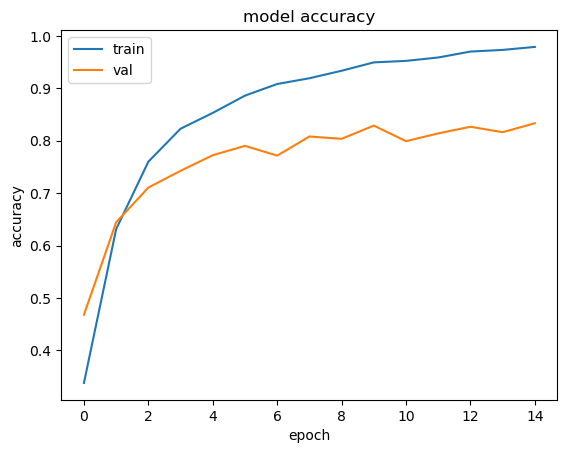

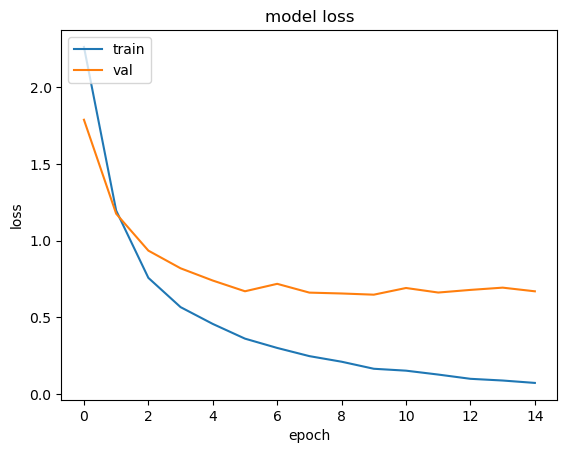

In [102]:
#Plotting Training and Validation Accuracy
# 'history.history['accuracy']' contains the accuracy values for...
#training set.
# 'history.history['val_accuracy']' contains the accuracy values...
#for validation set.
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy') #set title
plt.ylabel('accuracy') #set y-label
plt.xlabel('epoch') #set x-label
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Plotting Training and Validation Loss
# 'history.history['loss']' contains the loss values for...
#training set.
# 'history.history['val_loss']' contains the loss values...
#for validation set
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') #set title
plt.ylabel('loss') #set y-label
plt.xlabel('epoch') #set x-label
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [103]:
#We can also obtain the confusion matrix:
from sklearn import metrics
y_pred = model.predict(x_test)
cf_matrix= metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cf_matrix

105/105 [==============================] - 0s 2ms/step


array([[116,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   0,   0,
          0,   0],
       [  0, 111,   2,   0,   1,   0,   0,   0,   0,   0,   0,   2,   0,
          0,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   2,   0,
          0,   0],
       [  0,   0, 100,  12,   1,   1,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   3,   0,
          0,   0],
       [  0,   0,  13,  96,   0,   0,   1,   0,   1,   0,   0,   0,   2,
          1,   0,   0,   0,   2,   0,   2,   0,   0,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   0, 110,   6,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          2,   0],
       [  0,   0,   0,   0,   9, 106,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   2,   0,   0,   1,   0,   0,   0,   1,   0,
          0,   0],
       [  

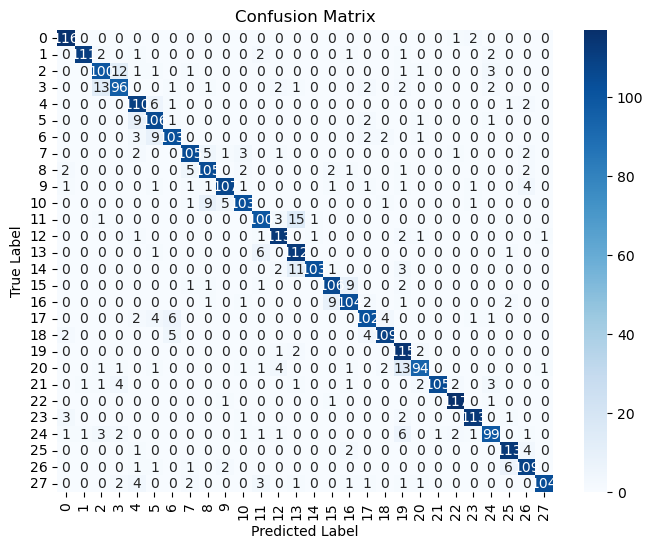

In [104]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [110]:
#Hybrid model 1st CNN model + Random Forest 
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
import numpy as np

#Since y_train and y_test are one-hot encoded for CNN,
#convert them back to class labels for RandomForestClassifier
y_train_flat = np.argmax(y_train, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

# Extract features from the trained CNN
train_features = model.predict(x_train)
test_features = model.predict(x_test)

# Flatten the features
train_features_flat = np.reshape(train_features, (train_features.shape[0], -1))
test_features_flat = np.reshape(test_features, (test_features.shape[0], -1))

# Train a Random Forest classifier on the extracted features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features_flat, y_train_flat)

# Predict using the trained classifier
y_pred_rf = rf_classifier.predict(test_features_flat)

# Predict probabilities for the test set for log loss calculation
y_pred_proba_rf = rf_classifier.predict_proba(test_features_flat)

# Calculate the log loss
log_loss_rf = log_loss(y_test, y_pred_proba_rf)  

print("Random Forest Test Log Loss:", log_loss_rf)

# Evaluate the Random Forest classifier's accuracy
accuracy_rf = accuracy_score(y_test_flat, y_pred_rf)  
print("Random Forest Test Accuracy:", accuracy_rf)


105/105 [==============================] - 0s 2ms/step
Random Forest Test Log Loss: 1.4994624271495312
Random Forest Test Accuracy: 0.8934206609109854


C:\Users\Fatima Al-Babily\anacondanew2\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [54]:
#Initialize model
model = Sequential()

#First Convolutional Block
#Add a 2D Convolutional layer with 32 filters, 
#a kernel size of 5x5, 'same' padding, and 'relu' activation.

model.add(Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(32, 32, 1)))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(Conv2D(32, (5, 5), activation="relu"))

#Incorporate a Max Pooling layer to reduce spatial dimensions,
#of the output from previous layers.
model.add(MaxPooling2D((2, 2)))
#normalize the activations and gradients propagating through the model,
#helps in speeding up the training process
model.add(BatchNormalization())


#Second Convolutional Block
#Similar to the first block, but with 64 filters...
#in each Convolutional layer to capture more detailed features.
model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

#Flattening the 3D output to 1D for the Dense layers
model.add(Flatten())
#Add two Dense layers with 128 neurons each and 'relu' activation...
#for learning from the flattened features.
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
#Incorporate Dropout to the model, with random value of (0.4)
#helps in preventing overfitting.
model.add(Dropout(0.4))

#Output Layer
#The final Dense layer with 28 neurons (for 28 classes) and 'softmax' activation
#to output the probability distribution across the classes.
model.add(Dense(28, activation="softmax"))

In [55]:
#print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 12, 12, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 64)       

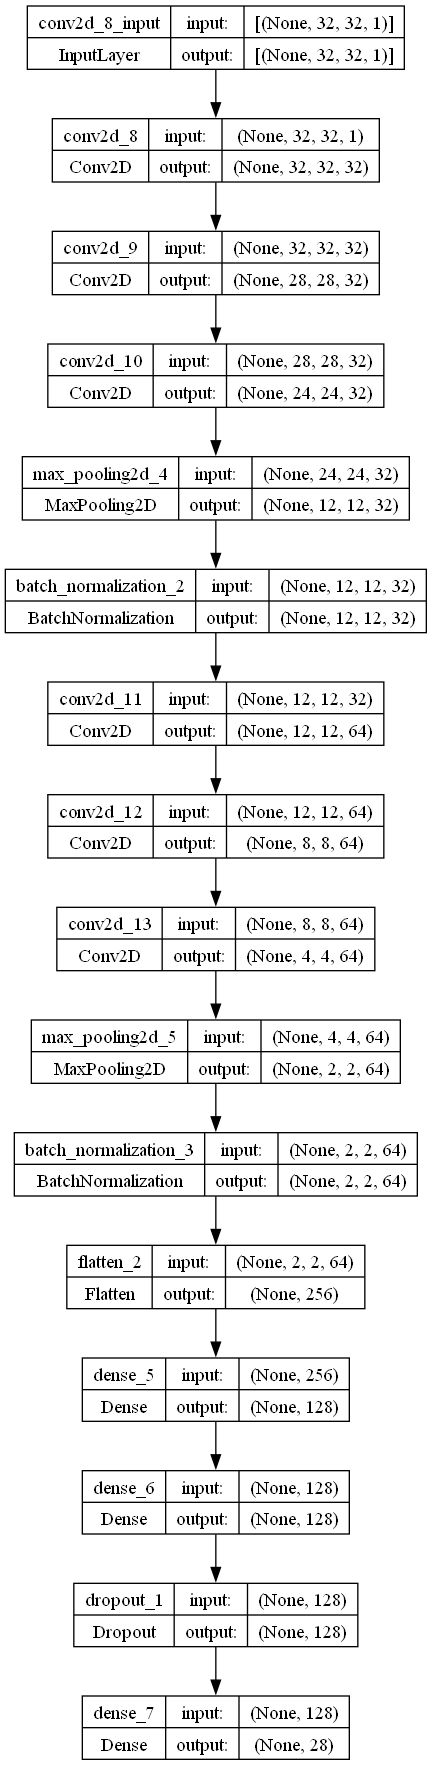

In [56]:
#plot the model to see layers clealry
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [57]:
#use optimizer to improve model
optimizer = Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

In [58]:
#Compile model same way as before
model.compile(optimizer = optimizer, loss = "categorical_crossentropy",metrics=["accuracy"])

In [59]:
datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1, # Randomly shift images vertically by up to 10%
    shear_range=0.2,        # Shear intensity (angle in radians)
    zoom_range=0.4,         # Randomly zoom into images by up to 20%
    horizontal_flip=False,  # Don't flip images horizontally
    vertical_flip=False,    # Don't flip images vertically
    fill_mode='nearest'     # Strategy for filling in newly created pixels after rotation or shifts
)

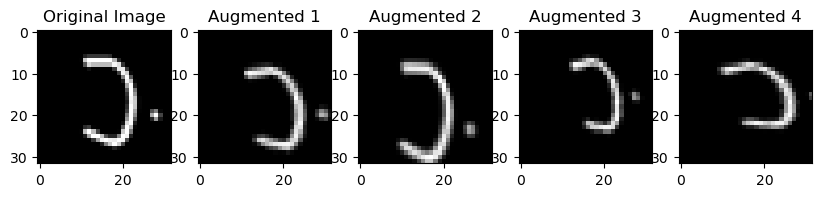

In [60]:
img = np.expand_dims(x_train[8], axis=0)

# Generate and plot augmented images
augmented_images = []

# Generate and plot augmented images
for batch in datagen.flow(img, batch_size=4):
    augmented_images.append(batch[0])
    if len(augmented_images) >= 4:
        break

# Plot the original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(151)
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.title('Original Image')

for i in range(4):
    plt.subplot(152 + i)
    plt.imshow(augmented_images[i][:, :, 0], cmap='gray')  # Fix indexing here
    plt.title(f'Augmented {i+1}')

plt.show()

In [61]:
#Evaluate the model


In [62]:
#Define batch size and number of epochs
batch_size = 128
epochs = 15

In [63]:
history_2nd_model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#The 'history_2nd_model' variable will store the training and validation...
#loss and accuracy for each epoch.
#This data is useful for visualizing the training process

Epoch 1/15
95/95 [==============================] - 9s 86ms/step - loss: 2.0416 - accuracy: 0.3705 - val_loss: 5.5952 - val_accuracy: 0.0357
Epoch 2/15
95/95 [==============================] - 8s 88ms/step - loss: 0.7961 - accuracy: 0.7329 - val_loss: 7.4386 - val_accuracy: 0.0379
Epoch 3/15
95/95 [==============================] - 8s 87ms/step - loss: 0.4372 - accuracy: 0.8598 - val_loss: 6.8912 - val_accuracy: 0.0365
Epoch 4/15
95/95 [==============================] - 8s 88ms/step - loss: 0.2967 - accuracy: 0.9070 - val_loss: 2.4710 - val_accuracy: 0.3497
Epoch 5/15
95/95 [==============================] - 8s 87ms/step - loss: 0.2191 - accuracy: 0.9332 - val_loss: 2.1772 - val_accuracy: 0.3966
Epoch 6/15
95/95 [==============================] - 8s 86ms/step - loss: 0.1637 - accuracy: 0.9502 - val_loss: 1.9738 - val_accuracy: 0.4747
Epoch 7/15
95/95 [==============================] - 8s 88ms/step - loss: 0.1469 - accuracy: 0.9558 - val_loss: 0.6740 - val_accuracy: 0.7820
Epoch 8/15
95

In [64]:
#Evaluate the Model on Test Data
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.30724531412124634
Test accuracy: 0.9249776601791382


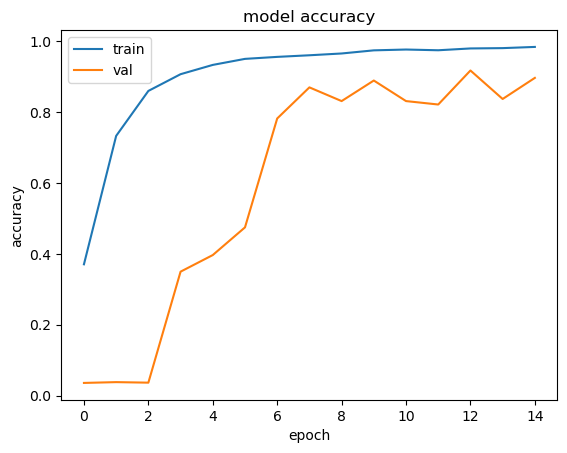

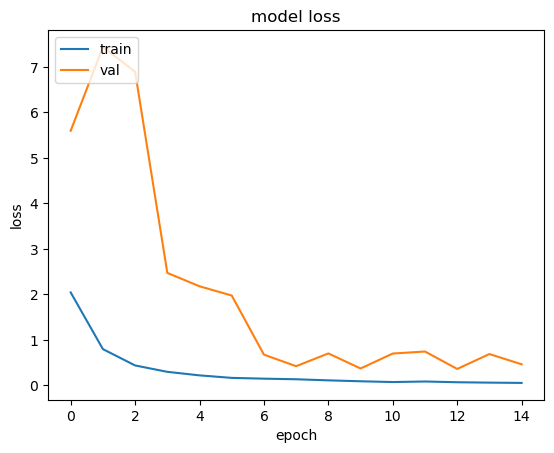

In [66]:
#Plotting Training and Validation Accuracy

#'history_2nd_model.history['accuracy']' contains the accuracy...
#values for training set.

#'history_2nd_model.history['val_accuracy']' contains the accuracy...
#values for validation set.

plt.plot(history_2nd_model.history['accuracy'])
plt.plot(history_2nd_model.history['val_accuracy'])
plt.title('model accuracy') #set title
plt.ylabel('accuracy') #set y-label
plt.xlabel('epoch')  #set x-label
plt.legend(['train', 'val'], loc='upper left')
plt.show() 

#Plotting Training and Validation loss

#'history_2nd_model.history['loss']' contains the loss...
#values for training set.

#'history_2nd_model.history['val_loss']' contains the loss...
#values for validation set.
plt.plot(history_2nd_model.history['loss'])
plt.plot(history_2nd_model.history['val_loss'])
plt.title('model loss') #set title
plt.ylabel('loss') #set y-label
plt.xlabel('epoch') #set x-label
plt.legend(['train', 'val'], loc='upper left')
plt.show()

105/105 [==============================] - 1s 7ms/step


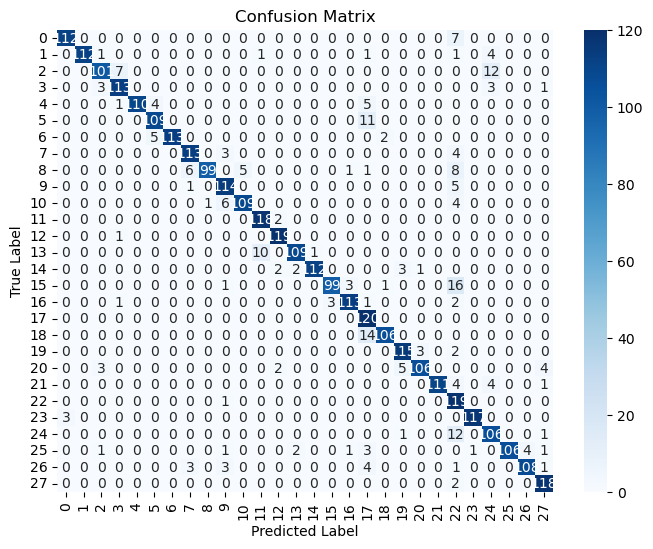

In [67]:
#Ploting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


# Make predictions with your model
y_pred = model.predict(x_test)

# Compute confusion matrix
cf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [69]:
#Hybrid model 2nd CNN model + Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

#Since y_train and y_test are one-hot encoded, 
#convert them back to class labels for RandomForestClassifier
y_train_flat = np.argmax(y_train, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

# Extract features from the trained CNN
train_features = model.predict(x_train)
test_features = model.predict(x_test)

# Flatten the features
train_features_flat = np.reshape(train_features, (train_features.shape[0], -1))
test_features_flat = np.reshape(test_features, (test_features.shape[0], -1))

# Train a Random Forest classifier on the extracted features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features_flat, y_train_flat)

# Predict using the trained classifier
y_pred_rf = rf_classifier.predict(test_features_flat)

# Predict probabilities for the test set for log loss calculation
y_pred_proba_rf = rf_classifier.predict_proba(test_features_flat)

# Calculate the log loss
log_loss_rf = log_loss(y_test, y_pred_proba_rf)
print("Random Forest Test Log Loss:", log_loss_rf)

# Evaluate the Random Forest classifier's accuracy
accuracy_rf = accuracy_score(y_test_flat, y_pred_rf)
print("Random Forest Test Accuracy:", accuracy_rf)


105/105 [==============================] - 1s 7ms/step
Random Forest Test Log Loss: 0.3805602015302283
Random Forest Test Accuracy: 0.9574278058946115


C:\Users\Fatima Al-Babily\anacondanew2\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [111]:
#same architecture as 2nd CNN model but with extra 13 layers...
#to make a total of 28
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Define the model
model = Sequential()

model.add(Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(32, 32, 1)))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))

# Adding 13 more dense layers
for _ in range(13):
    model.add(Dense(128, activation="relu"))

model.add(Dense(28, activation="softmax"))

# Compile the model
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Fit the model
batch_size = 128
epochs = 15
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Epoch 1/15
95/95 [==============================] - 11s 83ms/step - loss: 2.9470 - accuracy: 0.0752 - val_loss: 4.9679 - val_accuracy: 0.0357
Epoch 2/15
95/95 [==============================] - 7s 79ms/step - loss: 2.3245 - accuracy: 0.1595 - val_loss: 3.4402 - val_accuracy: 0.0670
Epoch 3/15
95/95 [==============================] - 7s 78ms/step - loss: 1.9663 - accuracy: 0.2196 - val_loss: 2.6185 - val_accuracy: 0.1719
Epoch 4/15
95/95 [==============================] - 9s 90ms/step - loss: 1.8095 - accuracy: 0.2657 - val_loss: 1.8110 - val_accuracy: 0.2917
Epoch 5/15
95/95 [==============================] - 9s 91ms/step - loss: 1.5865 - accuracy: 0.3370 - val_loss: 1.5335 - val_accuracy: 0.3378
Epoch 6/15
95/95 [==============================] - 8s 88ms/step - loss: 1.4092 - accuracy: 0.3944 - val_loss: 1.4339 - val_accuracy: 0.3966
Epoch 7/15
95/95 [==============================] - 8s 88ms/step - loss: 1.2917 - accuracy: 0.4394 - val_loss: 1.4817 - val_accuracy: 0.4315
Epoch 8/15
9